<a href="https://colab.research.google.com/github/aaakash06/PRODIGY_ML_5/blob/main/Fooder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-07-07 18:39:54.867742


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

--2024-07-07 18:40:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-07 18:40:16 (103 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

--2024-07-07 18:40:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  79.6MB/s    in 17s     

2024-07-07 18:40:34 (89.4 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/deviled_eggs'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/fish_and_chips'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/croque_madame'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/dumplings'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/chicken_quesadilla'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/cheese_plate'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/filet_mignon'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode="categorical",
                                                                                image_size=IMG_SIZE, batch_size=32)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False)


Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
train_data_all_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 101), dtype=tf.float32, name=None))>

In [ ]:
train_data_all_10_percent.class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
train_data_all_10_percent.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 101), dtype=tf.float32, name=None))>

In [ ]:
for images, labels in train_data_all_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[232.64285   222.64285   210.64285  ]
   [234.33163   224.33163   212.33163  ]
   [234.86224   224.86224   212.86224  ]
   ...
   [236.29085   220.71938   207.71938  ]
   [235.61734   219.61734   206.61734  ]
   [235.28572   219.28572   206.28572  ]]

  [[233.        224.        209.       ]
   [233.93367   224.93367   209.93367  ]
   [232.85715   223.85715   208.85715  ]
   ...
   [236.57147   221.        208.       ]
   [237.        221.        208.       ]
   [237.        221.        208.       ]]

  [[232.92346   223.92346   208.92346  ]
   [234.        225.        210.       ]
   [234.        225.        210.       ]
   ...
   [236.57149   221.00002   208.00002  ]
   [237.19897   221.19897   208.19897  ]
   [235.64282   219.64282   206.64282  ]]

  ...

  [[239.57147   227.57147   204.       ]
   [237.85716   225.85716   202.28569  ]
   [237.21426   225.21426   203.21426  ]
   ...
   [243.38261   227.38261   212.38261  ]
   [240.30101   224.30101   209.30101  ]
   [2

In [ ]:
checkpoint_path = "101_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True, # save only the model weights
                                                         monitor="val_accuracy", # save the model weights which score the best validation accuracy
                                                         save_best_only=True) # only keep the best model weights on file (delete the rest)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_augmentation = Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")


In [ ]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable = False

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer") # shape of input image
x = data_augmentation(inputs) # augment images (only happens during training)
x = base_model(x, training=False) # put the base model in inference mode so we can use it to extract features without updating the weights
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x) # pool the outputs of the base model
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x) # same number of outputs as classes
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling (Gl  (None, 1280)              0         
 obalAveragePooling2D)                                           
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                             

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(), # use Adam with default settings
              metrics=["accuracy"])

history_all_classes_10_percent = model.fit(train_data_all_10_percent,
                                           epochs=5, # fit for 5 epochs to keep experiments quick
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)), # evaluate on smaller portion of test data
                                           callbacks=[checkpoint_callback]) # save best model weights to file


Epoch 1/5
237/237 [==============================] - 160s 626ms/step - loss: 3.3763 - accuracy: 0.2738 - val_loss: 2.5428 - val_accuracy: 0.4391
Epoch 2/5
237/237 [==============================] - 106s 444ms/step - loss: 2.1961 - accuracy: 0.4978 - val_loss: 2.1202 - val_accuracy: 0.4873
Epoch 3/5
237/237 [==============================] - 91s 380ms/step - loss: 1.8275 - accuracy: 0.5657 - val_loss: 1.9035 - val_accuracy: 0.5217
Epoch 4/5
237/237 [==============================] - 78s 330ms/step - loss: 1.6060 - accuracy: 0.6075 - val_loss: 1.7974 - val_accuracy: 0.5358
Epoch 5/5
237/237 [==============================] - 77s 322ms/step - loss: 1.4529 - accuracy: 0.6504 - val_loss: 1.7794 - val_accuracy: 0.5286


In [ ]:
results_feature_extraction_model = model.evaluate(test_data)
results_feature_extraction_model

790/790 [==============================] - 58s 73ms/step - loss: 1.5813 - accuracy: 0.5815


[1.5812575817108154, 0.5815445780754089]

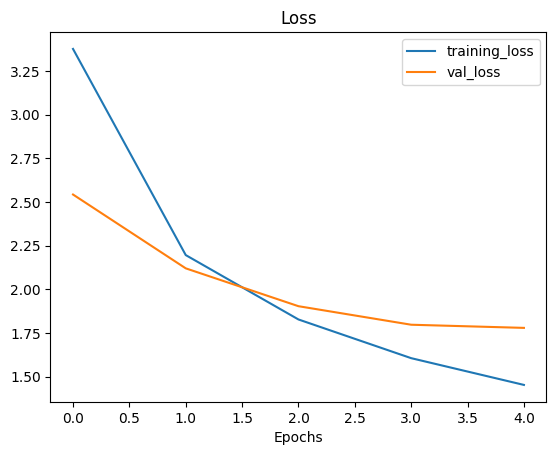

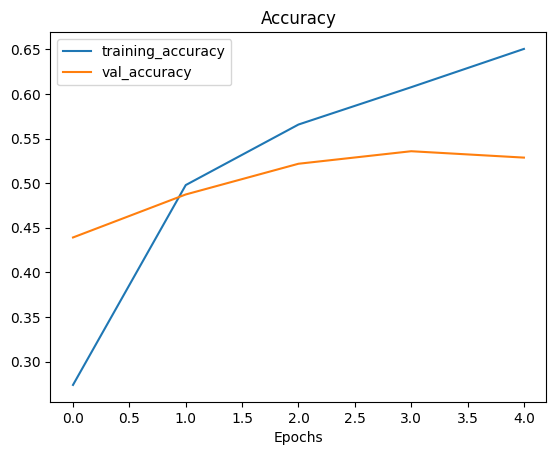

In [ ]:
plot_loss_curves(history_all_classes_10_percent)

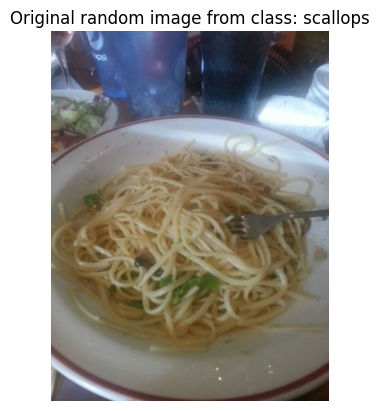

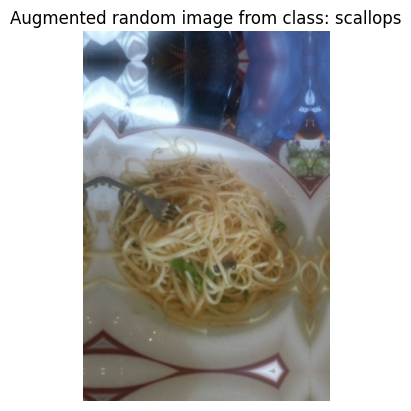

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_all_10_percent.class_names) # choose a random class
target_dir = "101_food_classes_10_percent/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [ ]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [ ]:
# Recompile model with lower learning rate
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), # 10x lower learning rate than default
              metrics=['accuracy'])

In [ ]:
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 True
global_average_pooling True
output_layer True


In [ ]:
# Fine-tune for 5 more epochs
fine_tune_epochs = 10 # model has already done 5 epochs, this is the total number of epochs we're after (5+5=10)

history_all_classes_10_percent_fine_tune = model.fit(train_data_all_10_percent,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)), # validate on 15% of the test data
                                                     initial_epoch=history_all_classes_10_percent.epoch[-1]) # start from previous last epoch

Epoch 5/10
237/237 [==============================] - 85s 326ms/step - loss: 1.2113 - accuracy: 0.6855 - val_loss: 1.6852 - val_accuracy: 0.5546
Epoch 6/10
237/237 [==============================] - 70s 295ms/step - loss: 1.1009 - accuracy: 0.7100 - val_loss: 1.7298 - val_accuracy: 0.5450
Epoch 7/10
237/237 [==============================] - 63s 265ms/step - loss: 1.0082 - accuracy: 0.7302 - val_loss: 1.7131 - val_accuracy: 0.5540
Epoch 8/10
237/237 [==============================] - 59s 247ms/step - loss: 0.9500 - accuracy: 0.7463 - val_loss: 1.6962 - val_accuracy: 0.5548
Epoch 9/10
237/237 [==============================] - 58s 244ms/step - loss: 0.8823 - accuracy: 0.7655 - val_loss: 1.7489 - val_accuracy: 0.5437
Epoch 10/10
237/237 [==============================] - 58s 245ms/step - loss: 0.8335 - accuracy: 0.7748 - val_loss: 1.7284 - val_accuracy: 0.5495


In [ ]:
# Evaluate fine-tuned model on the whole test dataset
results_all_classes_10_percent_fine_tune = model.evaluate(test_data)
results_all_classes_10_percent_fine_tune

790/790 [==============================] - 57s 72ms/step - loss: 1.5141 - accuracy: 0.6006


[1.514100432395935, 0.6005544662475586]

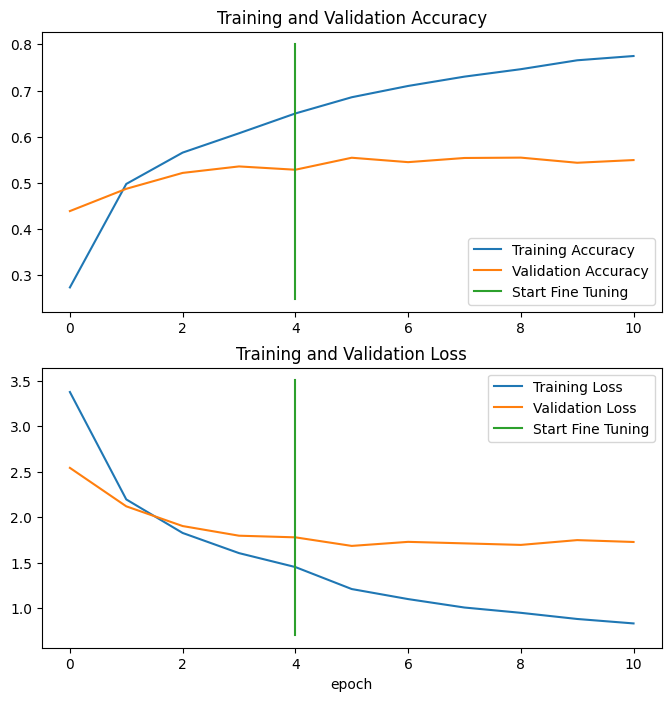

In [ ]:

compare_historys(original_history=history_all_classes_10_percent,
                 new_history=history_all_classes_10_percent_fine_tune,
                 initial_epochs=5)

In [ ]:
model.save("foodier1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
pred_probs = model.predict(test_data, verbose=1)

790/790 [==============================] - 65s 79ms/step


In [ ]:
len(pred_probs)
pred_probs.shape

(25250, 101)

In [ ]:
pred_probs[:10]


array([[2.2080427e-01, 8.0305972e-04, 2.7778611e-01, ..., 7.7901050e-06,
        8.0315052e-03, 2.9925758e-02],
       [9.0193868e-01, 1.8953941e-08, 4.3685603e-04, ..., 4.5601767e-03,
        1.0843697e-06, 4.4251756e-06],
       [1.9587250e-01, 1.2168073e-02, 2.0473242e-02, ..., 1.9657030e-04,
        1.2439678e-03, 8.1722764e-03],
       ...,
       [2.7682695e-01, 1.2626574e-05, 6.7178096e-04, ..., 1.7528945e-01,
        8.0380647e-04, 2.8730743e-04],
       [1.9617920e-01, 5.4229086e-04, 2.6714510e-01, ..., 2.9340983e-04,
        5.3349254e-04, 4.1624947e-04],
       [7.2507995e-01, 5.7211139e-07, 1.6025573e-03, ..., 3.3550591e-03,
        3.7042373e-06, 2.2939926e-03]], dtype=float32)

In [ ]:
pred_classes = pred_probs.argmax(axis=1)

In [ ]:
pred_classes[:10]

array([ 2,  0,  8,  8,  8, 78, 29,  0,  2,  0])

In [ ]:
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
from helper_functions import make_confusion_matrix

make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=test_data.class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.32      0.18      0.23       250
           1       0.51      0.74      0.60       250
           2       0.71      0.56      0.62       250
           3       0.87      0.45      0.59       250
           4       0.53      0.43      0.47       250
           5       0.51      0.35      0.42       250
           6       0.80      0.78      0.79       250
           7       0.90      0.66      0.76       250
           8       0.21      0.63      0.32       250
           9       0.36      0.71      0.48       250
          10       0.52      0.44      0.47       250
          11       0.83      0.54      0.66       250
          12       0.62      0.66      0.64       250
          13       0.60      0.53      0.56       250
          14       0.47      0.61      0.53       250
          15       0.44      0.37      0.40       250
          16       0.70      0.53      0.60       250
          17       0.43    

In [ ]:
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 0.32167832167832167,
  'recall': 0.184,
  'f1-score': 0.2340966921119593,
  'support': 250},
 '1': {'precision': 0.5054945054945055,
  'recall': 0.736,
  'f1-score': 0.5993485342019543,
  'support': 250},
 '2': {'precision': 0.7091836734693877,
  'recall': 0.556,
  'f1-score': 0.6233183856502242,
  'support': 250},
 '3': {'precision': 0.8692307692307693,
  'recall': 0.452,
  'f1-score': 0.5947368421052632,
  'support': 250},
 '4': {'precision': 0.5297029702970297,
  'recall': 0.428,
  'f1-score': 0.47345132743362833,
  'support': 250},
 '5': {'precision': 0.5057471264367817,
  'recall': 0.352,
  'f1-score': 0.41509433962264153,
  'support': 250},
 '6': {'precision': 0.7983539094650206,
  'recall': 0.776,
  'f1-score': 0.7870182555780935,
  'support': 250},
 '7': {'precision': 0.9010989010989011,
  'recall': 0.656,
  'f1-score': 0.7592592592592593,
  'support': 250},
 '8': {'precision': 0.21066666666666667,
  'recall': 0.632,
  'f1-score': 0.316,
  'support': 250},
 

In [ ]:
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[test_data.class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.2340966921119593,
 'baby_back_ribs': 0.5993485342019543,
 'baklava': 0.6233183856502242,
 'beef_carpaccio': 0.5947368421052632,
 'beef_tartare': 0.47345132743362833,
 'beet_salad': 0.41509433962264153,
 'beignets': 0.7870182555780935,
 'bibimbap': 0.7592592592592593,
 'bread_pudding': 0.316,
 'breakfast_burrito': 0.4764468371467025,
 'bruschetta': 0.47288503253796094,
 'caesar_salad': 0.6570048309178744,
 'cannoli': 0.640926640926641,
 'caprese_salad': 0.5605095541401273,
 'carrot_cake': 0.5321739130434783,
 'ceviche': 0.40262582056892776,
 'cheese_plate': 0.6031746031746033,
 'cheesecake': 0.4204081632653061,
 'chicken_curry': 0.4920634920634921,
 'chicken_quesadilla': 0.67420814479638,
 'chicken_wings': 0.7370441458733205,
 'chocolate_cake': 0.5570175438596491,
 'chocolate_mousse': 0.3717728055077453,
 'churros': 0.7372549019607844,
 'clam_chowder': 0.7121535181236675,
 'club_sandwich': 0.6769911504424779,
 'crab_cakes': 0.38740920096852305,
 'creme_brulee': 0.7664670

In [ ]:
import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores.head()

class_name  f1-score
33    edamame  0.964567
63   macarons  0.906383
32  dumplings  0.861789
75        pho  0.853333
69    oysters  0.847870

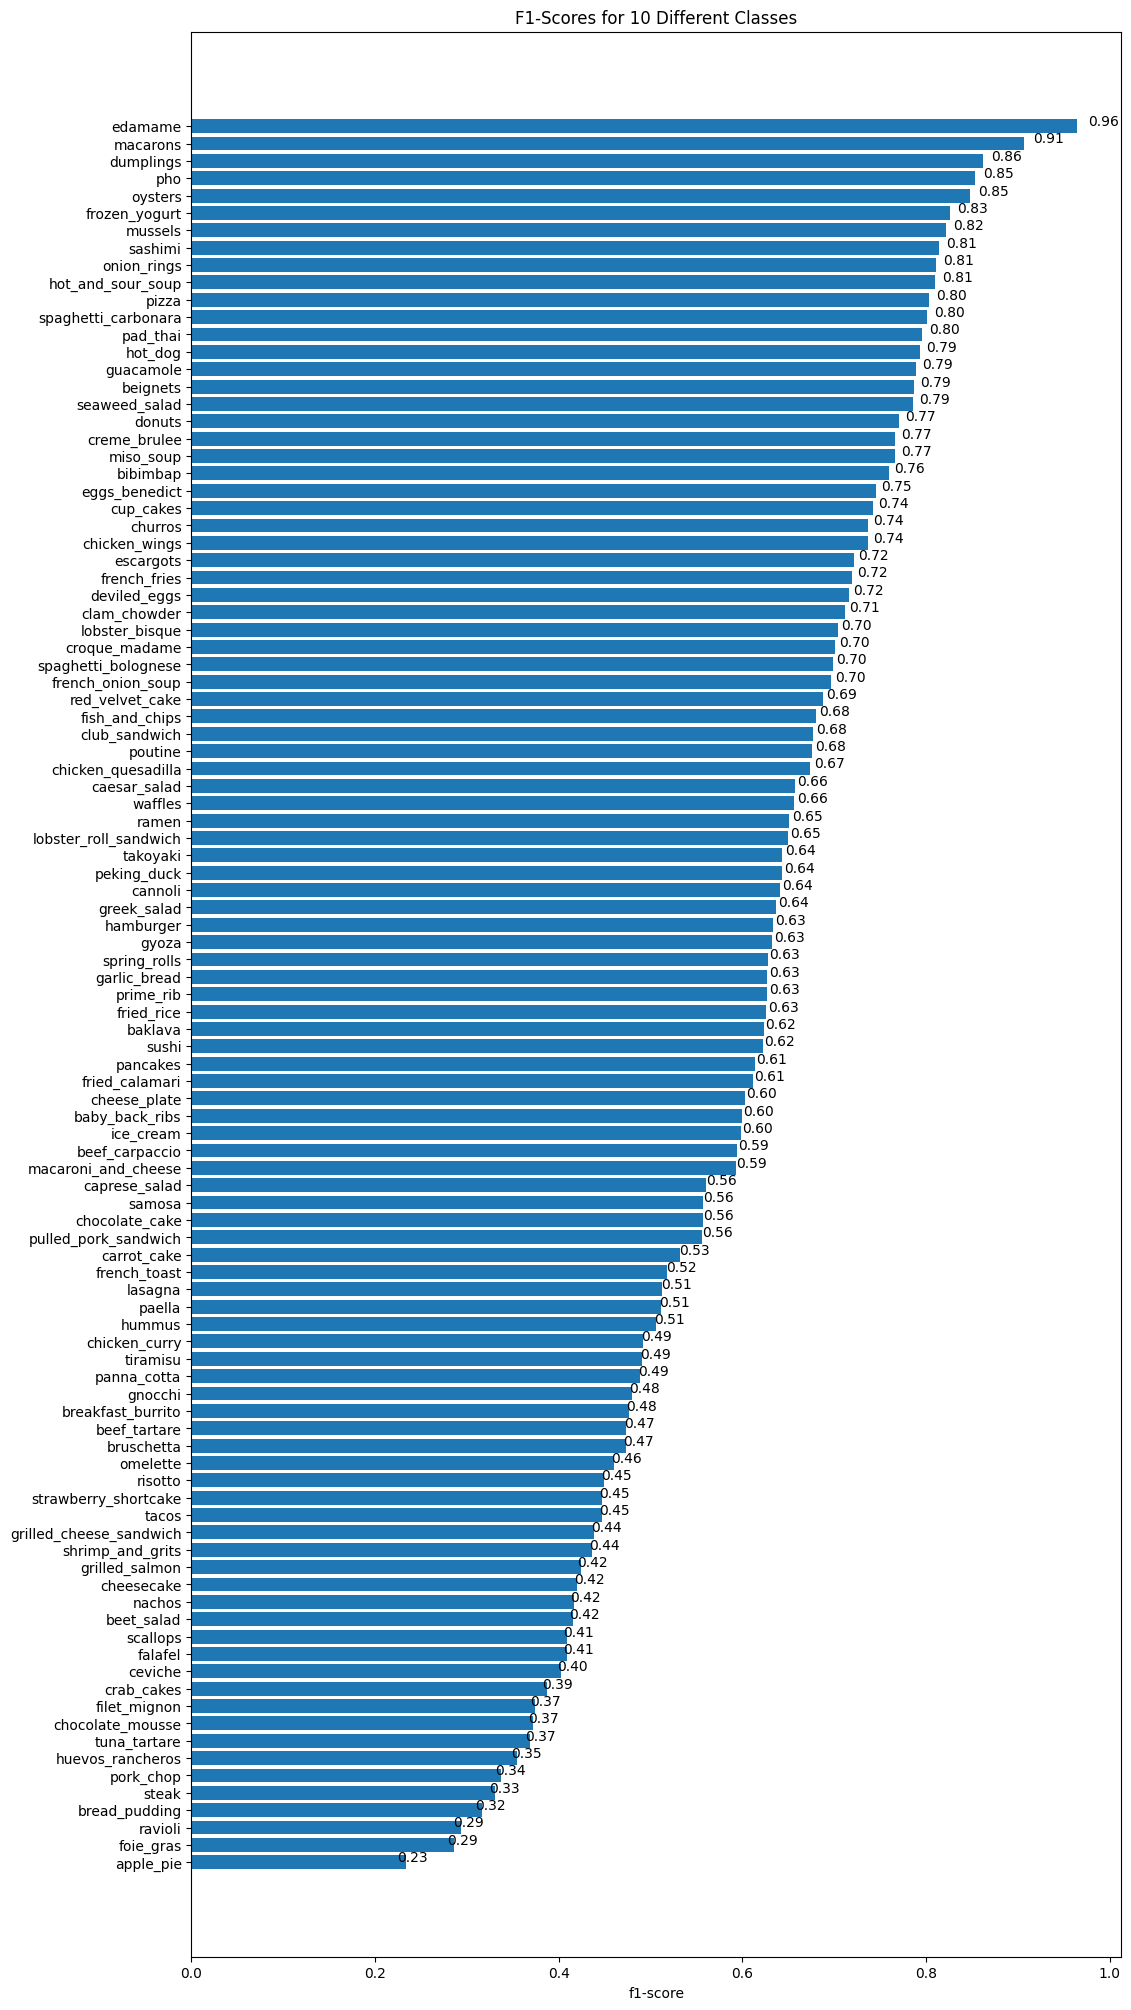

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

In [ ]:
from helper_functions import load_and_prep_image



1/1 [==============================] - 0s 33ms/step


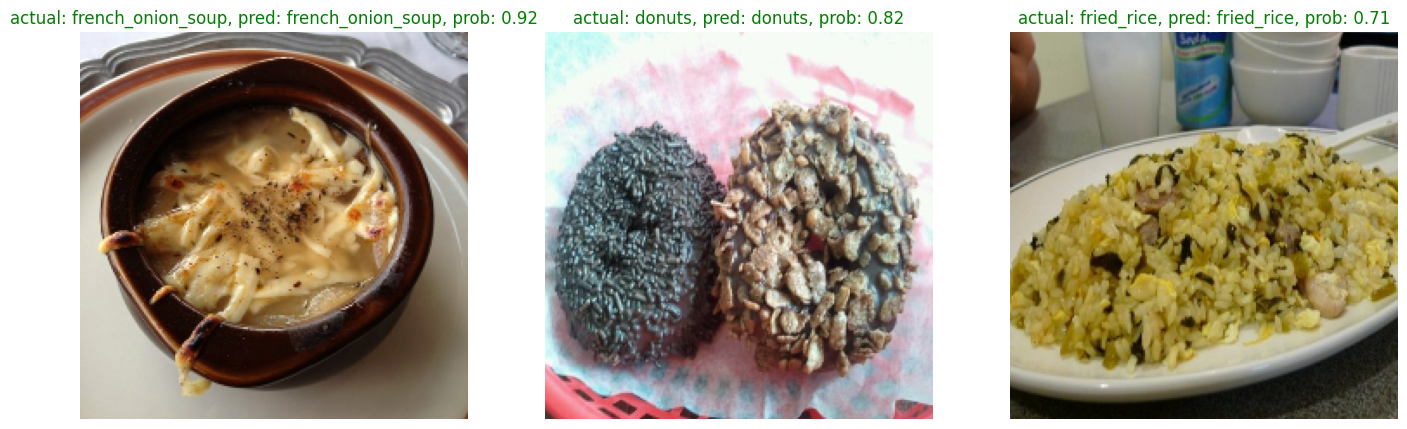

In [ ]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(test_data.class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = test_data.class_names[pred_prob.argmax()] # find the predicted class

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save a Keras model to Google Drive
model.save('/content/drive/My Drive/foodier1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
